In [1]:
from PokemonSet import PokemonSet
import pandas as pd
from sklearn import tree

In [2]:
df = pd.read_csv("pokemon.csv") 

In [3]:
ps = PokemonSet(data = df,feature = ["base_egg_steps","base_happiness","base_total","sp_attack","capture_rate"])

In [4]:
ps.data

,base_egg_steps,base_happiness,base_total,sp_attack,capture_rate,is_legendary
0,5120,70,318,65,45,0
1,5120,70,405,80,45,0
2,5120,70,625,122,45,0
3,5120,70,309,60,45,0
4,5120,70,405,80,45,0
...,...,...,...,...,...,...
796,30720,0,570,107,25,1
797,30720,0,570,59,255,1
798,30720,0,570,97,15,1
799,30720,0,600,127,3,1


In [5]:
ps.clean_data()

C:\Users\sydne\OneDrive\Documents\GitHub\PIC16A-Project-Fall-22\PokemonSet.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[f][i] = float(self.data[f][i])
C:\Users\sydne\OneDrive\Documents\GitHub\PIC16A-Project-Fall-22\PokemonSet.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[f] = self.data[f].astype('float64')
C:\Users\sydne\OneDrive\Documents\GitHub\PIC16A-Project-Fall-22\PokemonSet.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [6]:
# the previous bad capture_rate data 
ps.data.iloc[773]

base_egg_steps    6400.00000
base_happiness      70.00000
base_total         500.00000
sp_attack          100.00000
capture_rate        98.76125
is_legendary         0.00000
Name: 773, dtype: float64

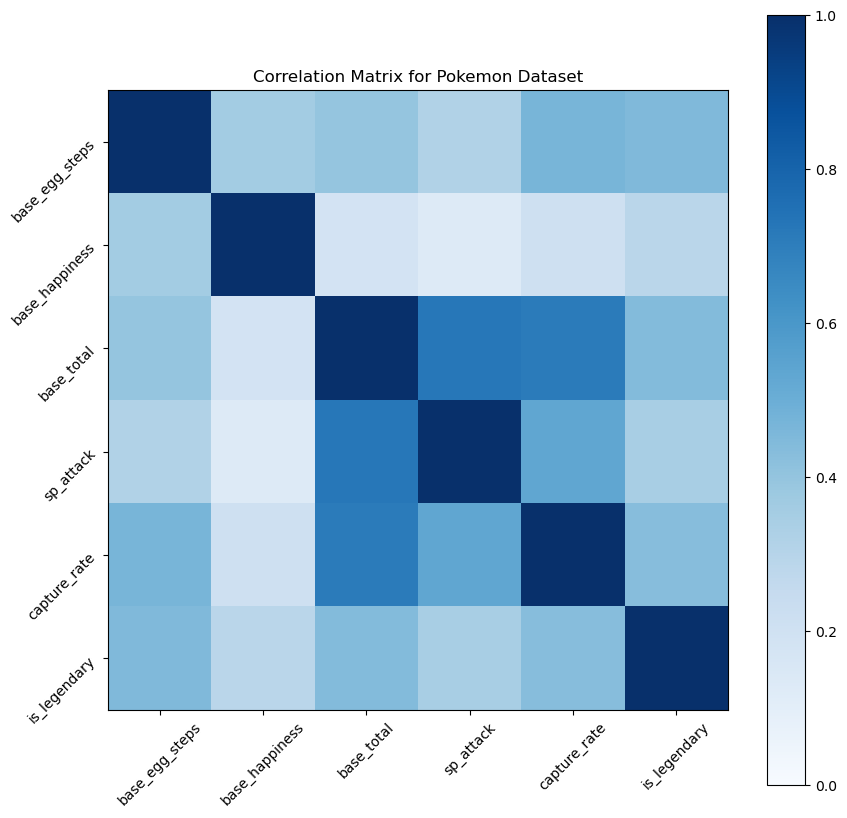

In [7]:
cc = ps.corr()

In [8]:
X_train, X_test, y_train, y_test = ps.split()

In [9]:
X_train

,base_egg_steps,base_happiness,base_total,sp_attack,capture_rate
523,3840.0,70.0,280.0,25.0,255.0
750,3840.0,70.0,269.0,40.0,200.0
426,5120.0,0.0,350.0,44.0,190.0
41,3840.0,70.0,455.0,65.0,90.0
495,5120.0,70.0,413.0,60.0,45.0
...,...,...,...,...,...
71,5120.0,70.0,335.0,50.0,190.0
106,6400.0,70.0,455.0,35.0,45.0
270,3840.0,70.0,340.0,60.0,120.0
435,5120.0,70.0,300.0,24.0,255.0


In [10]:
y_train

523    0.0
750    0.0
426    0.0
41     0.0
495    0.0
      ... 
71     0.0
106    0.0
270    0.0
435    0.0
102    0.0
Name: is_legendary, Length: 560, dtype: float64

In [11]:
model = ps.make_decision_tree_model()
print(model)

Using depth 5
Score on testing data : 0.995850622406639
DecisionTreeClassifier(max_depth=5)


[Text(0.4583333333333333, 0.9, 'X[0] <= 15360.0\ngini = 0.148\nsamples = 560\nvalue = [515, 45]'),
 Text(0.25, 0.7, 'X[4] <= 14.0\ngini = 0.019\nsamples = 518\nvalue = [513, 5]'),
 Text(0.16666666666666666, 0.5, 'X[3] <= 70.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 511\nvalue = [511, 0]'),
 Text(0.6666666666666666, 0.7, 'X[2] <= 552.0\ngini = 0.091\nsamples = 42\nvalue = [2, 40]'),
 Text(0.5, 0.5, 'X[2] <= 467.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.5, 'X[2] <= 575.0\ngini = 0.049\nsamples = 40\nvalue = [1, 39]'),
 Text(0.75, 0.3, 'X[4] <= 9.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.666666666666666

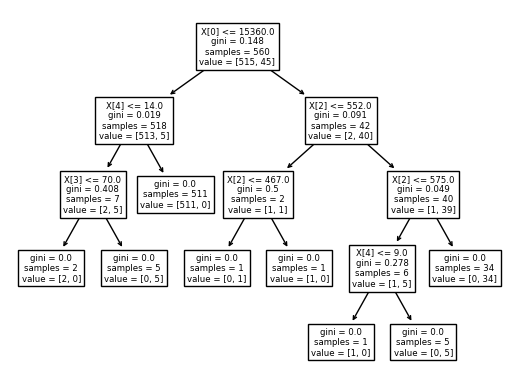

In [12]:
tree.plot_tree(model)

In [13]:
print("Predictions: ")
print(model.predict(X_train.iloc[0:10]))
print("Actual: ")
print(y_train.iloc[0:10])

# print(ps.data.iloc[0])
# print(X_train.shape)

Predictions: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Actual: 
523    0.0
750    0.0
426    0.0
41     0.0
495    0.0
108    0.0
344    0.0
56     0.0
259    0.0
479    1.0
Name: is_legendary, dtype: float64


In [14]:
print(model.predict([list(X_train.iloc[0])]))
print(X_train.iloc[0])
print([list(X_train.iloc[0])])

[0.]
base_egg_steps    3840.0
base_happiness      70.0
base_total         280.0
sp_attack           25.0
capture_rate       255.0
Name: 523, dtype: float64
[[3840.0, 70.0, 280.0, 25.0, 255.0]]


C:\Users\sydne\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
